# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Create MNIST dataset
mnist_dataset = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)

# Split the dataset into train, test, and validation sets
train_size = int(0.6 * len(mnist_dataset))
val_size = int(0.2 * len(mnist_dataset))
test_size = len(mnist_dataset) - train_size - val_size

train_set, val_set, test_set = torch.utils.data.random_split(mnist_dataset, [train_size, val_size, test_size])

# Create train, test, and validation dataloaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64)
test_loader = DataLoader(test_set, batch_size=64)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# # Define transforms
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# # Create training set and define training dataloader
# training_data = torchvision.datasets.MNIST(root = "data", train=True, download=True, transform=transform)
# train_loader = DataLoader(training_data, batch_size=64, shuffle=True)


# # Create test set and define test dataloader
# test_data = torchvision.datasets.MNIST(root = "data", train=False, download=True, transform=transform)
# test_loader = DataLoader(test_data, batch_size=64)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

By applying appropriate transforms to the MNIST dataset, we can ensure that the data is prepared in a suitable format for training and improve the model's performance by incorporating normalization and data augmentation techniques. Here in transform I have use only 0.5 for mean and 0.5 std for only one channel. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


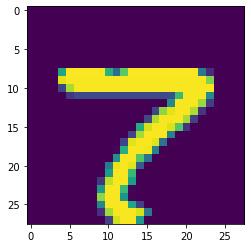

4


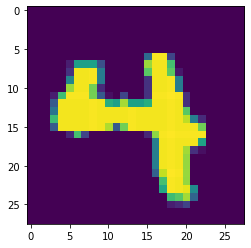

6


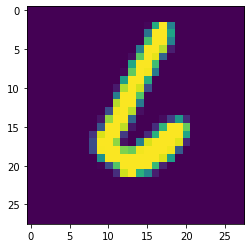

3


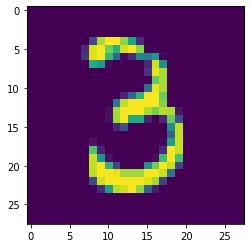

3


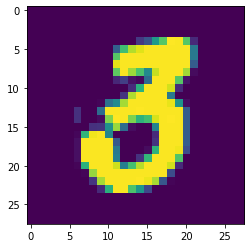

In [5]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [7]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28 * 1, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.fc1(x))
        x = F.relu(x)
        x = self.activation(self.fc2(x))
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x


# Instantiate the model
net = Net()

net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
# Define the loss
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(net.parameters(), lr = 0.003)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Establish a list for our history
train_loss_history = []
val_loss_history = []

In [10]:
num_epochs = 5
for epoch in range(num_epochs):
    
    train_loss = 0
    train_correct = 0
    train_accuracy = []
    
    for i, (inputs, labels) in enumerate(train_loader):
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        
        train_loss += loss.item()
        train_accuracy.append((preds == labels).sum().item() / preds.size(0) * 100)
        
    train_accuracy_calc = np.mean(train_accuracy)
    train_loss_calc = train_loss/len(train_loader)
    train_loss_history.append(np.mean(train_loss)/len(train_loader))
    
    print(f'Epoch {epoch + 1} train accuracy: {train_accuracy_calc:.2f}% train loss: {train_loss_calc:.5f}')
    
    val_loss = 0
    val_correct = 0
    val_accuracy = []
    
    for i, (inputs, labels) in enumerate(val_loader):
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        outputs = net(inputs)
        _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)
        
        val_loss += loss.item()
        val_accuracy.append((preds == labels).sum().item() / preds.size(0) * 100)
        
    val_accuracy_calc = np.mean(val_accuracy)
    val_loss_calc = val_loss/len(test_loader)
    val_loss_history.append(np.mean(val_loss)/len(test_loader))
    
    print(f'Epoch {epoch + 1} val accuracy: {val_accuracy_calc:.2f}% val loss: {val_loss_calc:.5f}')

Epoch 1 train accuracy: 81.24% train loss: 1.65561
Epoch 1 val accuracy: 89.89% val loss: 1.56389
Epoch 2 train accuracy: 90.24% train loss: 1.55998
Epoch 2 val accuracy: 91.44% val loss: 1.54638
Epoch 3 train accuracy: 91.51% train loss: 1.54678
Epoch 3 val accuracy: 92.54% val loss: 1.53577
Epoch 4 train accuracy: 92.04% train loss: 1.54088
Epoch 4 val accuracy: 91.84% val loss: 1.54317
Epoch 5 train accuracy: 92.69% train loss: 1.53447
Epoch 5 val accuracy: 93.31% val loss: 1.52728


Plot the training loss (and validation loss/accuracy, if recorded).

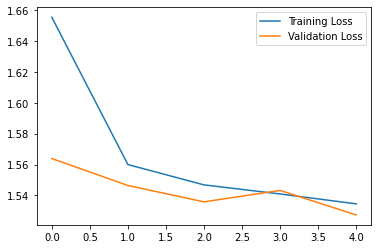

In [11]:
plt.plot(train_loss_history, label = 'Training Loss')
plt.plot(val_loss_history, label = 'Validation Loss')
plt.legend()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
def test(net, test_loader):
    test_loss = 0
    test_correct = 0
    test_accuracy = []
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            if torch.cuda.is_available():
                inputs, labels = inputs.cuda(), labels.cuda()

            outputs = net(inputs)
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            test_accuracy.append((preds == labels).sum().item() / preds.size(0) * 100)

    test_accuracy_calc = np.mean(test_accuracy)
    test_loss_calc = test_loss / len(test_loader)
    print(f'Test accuracy: {test_accuracy_calc:.2f}% test loss: {test_loss_calc:.5f}')


In [13]:
test(net, test_loader)

Test accuracy: 93.32% test loss: 1.52817


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [14]:
# Since the accuracy is above 90% it seems not make any further improvements. 

## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'net_state_dict': net.state_dict(),
             'optim_state_dic', optimizer.state_dict()}

torch.save(checkpoint, 'MINIST_Handwritten_Digit.pth')

SyntaxError: invalid syntax (<ipython-input-15-6df4d8196c3a>, line 4)